Typical plasma parameters
===

Using the experimental result measured by the langmuir probe, electron density and temperature has been specified at 2 points. Considering both experimental data and equilibrium data calculated by TSC (Tokamak Simulation Code) has enabled us to obtain their 2-D profiles.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter
from raysect.optical import World
from cherab.core.math import sample3d, sample2d, sample1d
from cherab.phix.plasma import import_plasma, PHiXSpecies
from cherab.phix.tools import show_phix_profiles, import_phix_rtm

plt.rcParams["figure.dpi"] = 150
world = World()
plasma, eq = import_plasma(world)
species = PHiXSpecies(equilibrium=eq)
rtm = import_phix_rtm(world, eq)

loading plasma (data from: phix10)...


In [2]:
dr = rtm.material.dr
dz = rtm.material.dz
nr = rtm.material.grid_shape[0]
nz = rtm.material.grid_shape[2]
rmin = rtm.material.rmin
zmin = rtm.transform[2, 3]
rmax = rmin + dr * nr
zmax = zmin + dz * nz

Plotting the plasma parameters distribution in 1D vs $\psi_\text{normalized}$ and 2D $r-z$ space
---

Plasma parameters ($n_\text{e}, T_\text{e}$) is assumed to distribute as quadratic function along to $\psi$.
For instance, $n_\text{e}$ represents as follows:

\begin{align}
n_e = (n_{\min} - n_{\max}) \psi^2 + n_{\min}
\end{align}

The values of $n_{\min}$ and $n_{\max}$ are used as an experimental data measured by the langmuir probe which locates both near magnetic axis and LCFS.

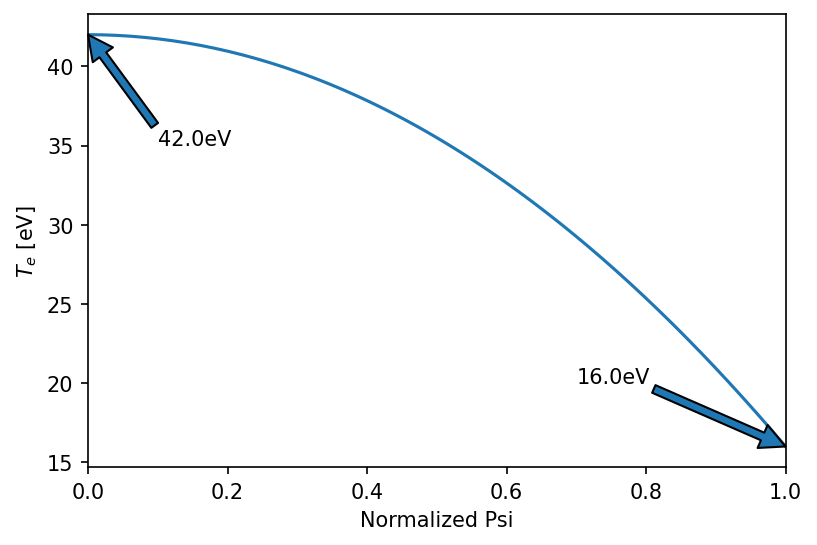

In [3]:
x = np.linspace(0, 1, 100)
y = [species.temp1d(i) for i in x]
plt.plot(x,y);
plt.xlabel("Normalized Psi");
plt.ylabel("$T_e$ [eV]");
plt.xlim([0,1]);
plt.annotate(f"{y[0]}eV", (x[0], y[0]), (0.1, 35), arrowprops=dict());
plt.annotate(f"{y[-1]}eV", (x[-1], y[-1]), (0.7, 20), arrowprops=dict());

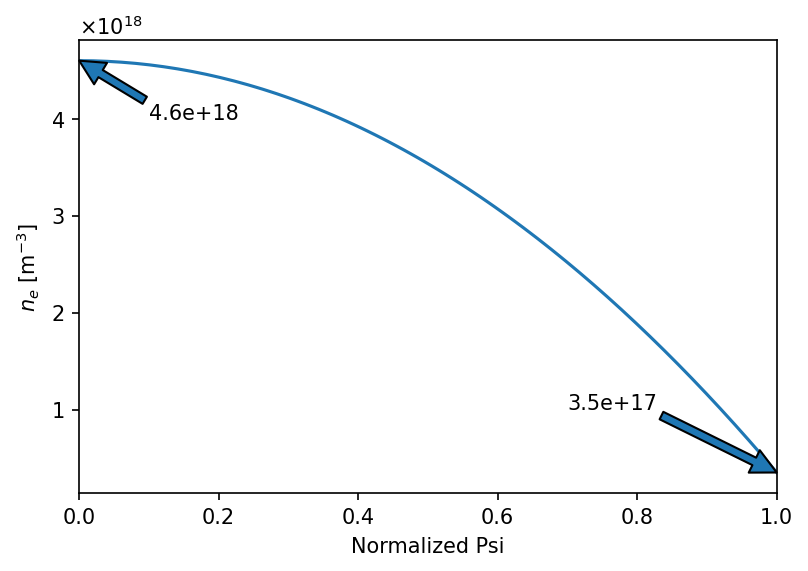

In [4]:
x = np.linspace(0, 1, 100)
y = [species.dens1d(i) for i in x]
fig, ax = plt.subplots()
ax.plot(x,y);
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.set_xlabel("Normalized Psi");
ax.set_ylabel("$n_e$ [m$^{-3}$]");
ax.set_xlim([0,1]);
plt.annotate(f"{y[0]}", (x[0], y[0]), (0.1, 4e18), arrowprops=dict());
plt.annotate(f"{y[-1]}", (x[-1], y[-1]), (0.7, 1e18), arrowprops=dict());

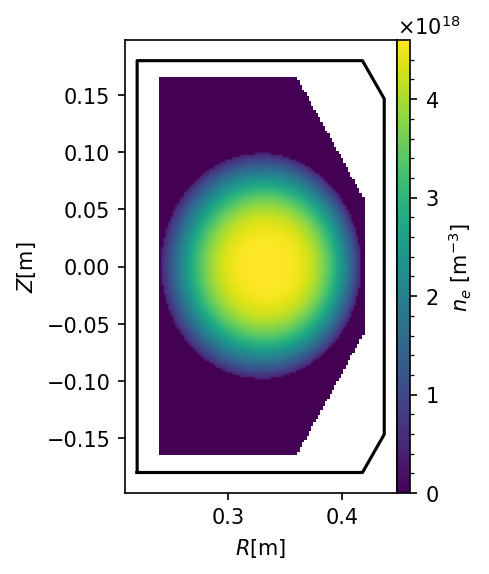

In [5]:
r, _, z, ne_samples = sample3d(plasma.electron_distribution.density, (rmin, rmax, nr), (0, 0, 1), (zmin, zmax, nz))
show_phix_profiles(ne_samples.squeeze(), clabel="$n_e$ [m$^{-3}$]", cmap="viridis", scientific_notation=True);

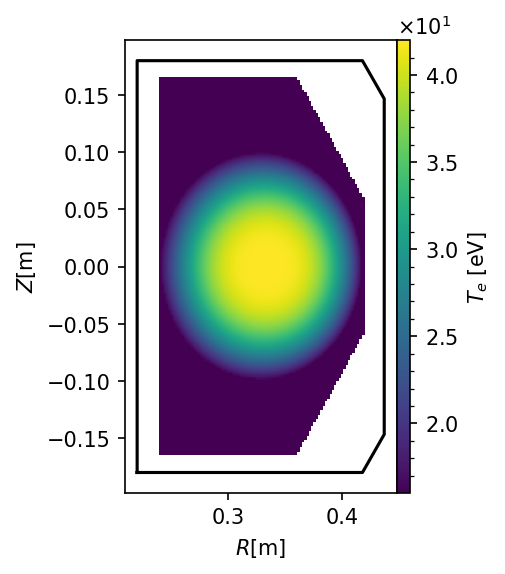

In [6]:
r, _, z, te_samples = sample3d(plasma.electron_distribution.effective_temperature, (rmin, rmax, nr), (0, 0, 1), (zmin, zmax, nz))
show_phix_profiles(te_samples.squeeze(), clabel="$T_e$ [eV]", cmap="viridis");

Density Profile along R axis on the equatorial plane.
---

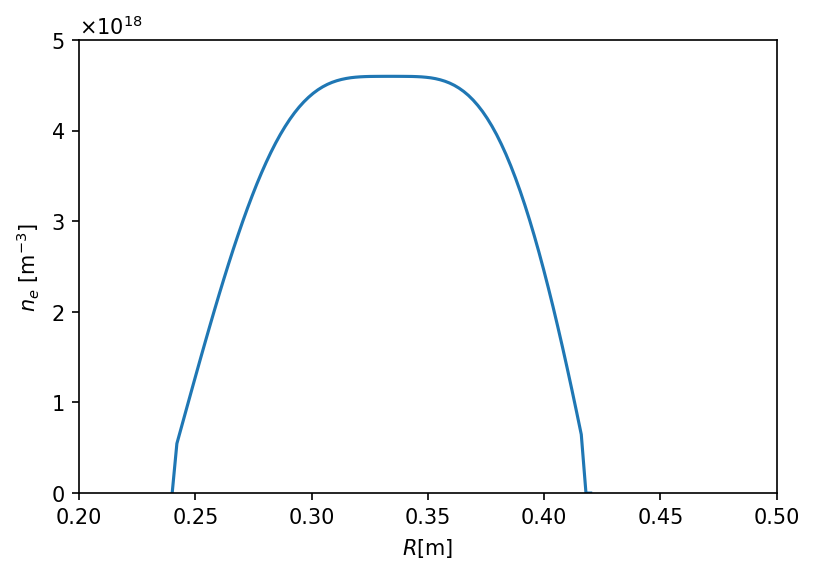

In [7]:
r, _, z, t_samples = sample3d(plasma.electron_distribution.density, (rmin, rmax, nr), (0, 0, 1), (eq.magnetic_axis.y, eq.magnetic_axis.y, 1))
fig, ax = plt.subplots()
ax.plot(r, t_samples.ravel())
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.xlabel("$R$[m]");
plt.ylabel("$n_e$ [m$^{-3}$]");
plt.xlim([0.2, 0.5]);
plt.ylim([0, 5e18]);

Q profile as a function of $\psi_\text{normalized}$
---

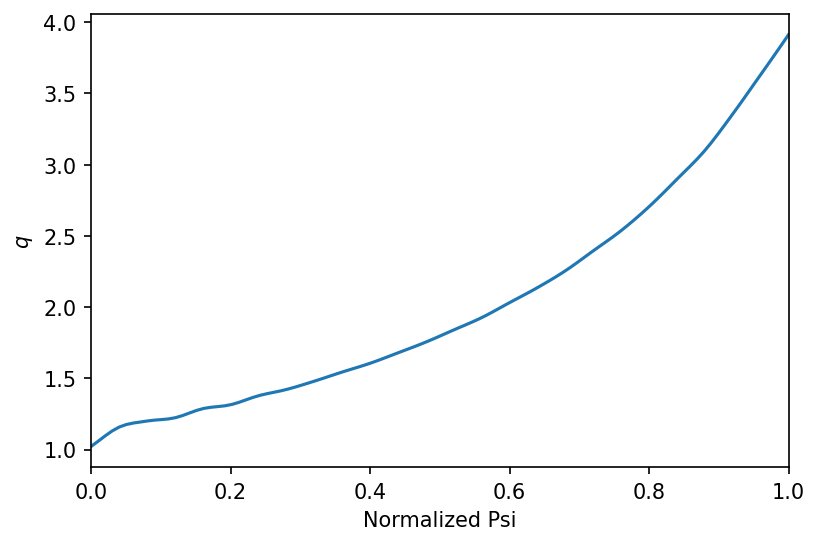

In [8]:
x = np.linspace(0, 1, 100)
y = [eq.q(i) for i in x]
plt.plot(x,y);
plt.xlabel("Normalized Psi");
plt.ylabel("$q$");
plt.xlim([0,1]);